#  Quick Intro to Google Colab

* In ML you will often have many large data sets

- at a certain point you won't be able to fit it all on 1 CPU, for example

- Mounting your drive can be very helpful to store and manage data

- plus its safe and accessible anywhere

In [0]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In Colab NB you can run **command line** 
statements with **!**.

Here are some examples showing how it can be useful:


* navigate through or create new directories in your drive:



In [0]:
# import operating system and change to directory
import os
os.chdir('/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Week_1/')
# note that you wont be able to write files to my shared folder 
# (but you can make/copy your own folder on your drive if you want)
! mkdir 'test_files'
! ls

mkdir: cannot create directory ‘test_files’: File exists
column_3C.dat	       ML_Week1.ipynb  test.py
day1.csv	       ML_Week2.ipynb  WA_Fn-UseC_-Telco-Customer-Churn.csv
KaggleV2-May-2016.csv  test_files


You usually wont need to, but if any libraries are not already installed (cannot be directly imported); just use:

`!pip install`

* run other Python files (esp. old file not in a notebook and/or without GPU):

In [0]:
# run python file already in drive directory
! python test.py

.py python test file running!


* create text files in drive, to read/write

In [0]:
# create a file in drive
os.chdir('./test_files/')
with open('test2.txt', 'w') as f:
  f.write('Test file #2 exists in drive!')

# read it
f = open("test2.txt", "r")
print(f.read())

Test file #2 exists in drive!


* download data from internet into drive:

In [0]:
# get from internet
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
# unzip
!unzip -qq flower_data.zip

In [0]:
# clean up 
os.rmdir("test_files")

Also for **free GPU** :

From task bar: Runtime -> Change runtime type

Hardware accelerator: None -> GPU

* We wont need this *yet*, but in ML you will often need a GPU to train your model because you will have large data sets and will want to train as fast as possible (or it could take days on a CPU)

In [0]:
# use Tensorflow to detect GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


- can also switch between **Python 2 and 3** (in Runtime Type)
- or download **.py or .pynb** (under File menu)
- and discover lots more cool features on your own! (if new to Colab)

# Quick Intro to Data Analysis Libraries (for ML in Python)

**data processing** is essential to machine learning so it is important to be aware of the libraries we can use to help us do it efficiently

* optimized/faster matrix and vector operations

* methods to assign, access, and manipulate data slices quickly and efficiently

* part of the "Python *machine learning ecosystem*"



### NumPy


1. **NumPy** (numeric python)

  * easy methods to apply to scientific data and do mathematical operations
  * best for multi-dim arrays (n axes is the 'rank')
  * homogeneous type elements (usually integers)
  * best for element-wise calculations, matrix operations
  * 50X faster than Python lists (because of 'locality of reference' and parts written in C/C++)


In [0]:
import numpy as np

# create large arrays quick without loops, eg.
arr = np.random.rand(1000,1000)

# similar syntax 
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]], dtype='float')

# number of dims (just one np method example)
print(arr.shape)

# faster access:
arr[0, 1, 2]

# see docs for other methods, if this is new

(2, 2, 3)


6.0

### Pandas

2. **Pandas**: 

  * best for 2-D table-like or spreadsheet data-frames
  * easy to export/import CSV, Excel, JSON, HTML and SQL database
  * easy to add, remove, sort, ect. columns or rows

In [0]:
import pandas as pd

# pandas series is a 1-D vector
# can create a pandas DF from a dict of series (where keys become column names)
activity_dict = { "weight": pd.Series([130, 200, 112],index=["Jeff", "John", "Morgan"]),
               "age": pd.Series([84, 35, 28], index=["Jeff", "John", "Morgan"]), 
              "sport": pd.Series(["Biking", "Dancing"], index=["John", "Jeff"]),}

activity = pd.DataFrame(activity_dict)
activity

,weight,age,sport
Jeff,130,84,Dancing
John,200,35,Biking
Morgan,112,28,NaN


* often times we have data frames with **NA** values and we dont even know
* then our ML algorithm will return an error (so we need to fix it somehow first)
* this is how we can find out how many of them are in each feature column

In [0]:
# see 
activity.isnull().sum()

weight    0
age       0
sport     1
dtype: int64

* sport column has 1 NA
* if we still want to include this row in our test or train data, there are a number of ways we might want to handle this
* one may be to fill it in with the most common sport (because it might be most likely anyways)
* so lets count how many there are of each sport in our df

In [0]:
activity["sport"].value_counts()

Biking     1
Dancing    1
Name: sport, dtype: int64

* replace rows in sport col with NA with "Dancing"

In [0]:
activity["sport"] = activity["sport"].fillna("Dancing")
activity

,weight,age,sport
Jeff,130,84,Dancing
John,200,35,Biking
Morgan,112,28,Dancing


* if our missing value was an interger such as in the weight col we might fill with the mean
* there is also a method for that

In [0]:
activity["weight"].mean()

147.33333333333334

* also often will need to locate rows in columns having certain values or meeting certain conditions
* eg. turn to it into an **indicator variable** column for Dancing 

In [0]:
activity.loc[activity["sport"] != "Dancing","sport"] = 0
activity.loc[activity["sport"] == "Dancing","sport"] = 1
activity

,weight,age,sport
Jeff,130,84,1
John,200,35,0
Morgan,112,28,1


# Chapter 1: Regression

## 1.2. The Bike Sharing Dataset


* Matloff's slightly modified version of data available on the **UCI Machine Learning** website
  * numeric weather variables in original scale

* `.head()` function is used to view the top of the data so you can see the column names, first 5 rows

In [0]:
# You may need to modify your path based on where you 
# copy stuff from ecs171_yancey in your drive
# but I shared this day1.csv dataset in 'ecs171_yancey/Lecture_Notes/week_1/':
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Week_1/day1.csv'

# load .csv using Pandas library
day1 = pd.read_csv(my_path)

# look at the first few rows and show features 
day1.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349
3,4,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,10.739832,108,1454,1562
4,5,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,12.522300,82,1518,1600


In [0]:
day1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  731 non-null    int64  
 1   instant     731 non-null    int64  
 2   dteday      731 non-null    object 
 3   season      731 non-null    int64  
 4   yr          731 non-null    int64  
 5   mnth        731 non-null    int64  
 6   holiday     731 non-null    int64  
 7   weekday     731 non-null    int64  
 8   workingday  731 non-null    int64  
 9   weathersit  731 non-null    int64  
 10  temp        731 non-null    float64
 11  atemp       731 non-null    float64
 12  hum         731 non-null    float64
 13  windspeed   731 non-null    float64
 14  casual      731 non-null    int64  
 15  registered  731 non-null    int64  
 16  tot         731 non-null    int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


### 1.2.2. Dummy (Indicator) Variables

* Take on 1 or 0 only 
  * Eg **Urban, Rural, Suburban** may be represented as **1, 2, 3** (even though one is not more than the other) because they are *categorical variables*

  * So we need to convert these to dummies so that the ML algorithm knows they are 
    * eg. so it knows that 1 is not "less good" than 3
* can use `pd.get_dummies()`

## 1.3. Prediction, 1.4 Classification, 1.5. Stats vs. ML

* Predictor variables are called ***features***

* Helpful way to predict the future 

  * eg. Market demand, disease progression

* but not always about the future

  * eg. Sometimes we predict things that happened in the past or present where we don’t know what actually happened

* ***Classification*** is a type of prediction in which we are predicting a dummy variable

  * or a multiclass problem we could predict multiple dummy variables

* Some prediction methods originally developed in ML (**SVM, NN, ect.**), while others originally from stats (**KNN, RF, Decision Trees, Log Regression**)

## 1.6. Predictions with a Single Feature

* If we were to predict ridership using **KNN** with a single feature (eg. temperature is 28 degrees) we would…
  * 1) gather all the data points with temperatures closest to 28
  * 2) average the ridership on that day

* this would be our prediction for a 28 degree day where we don’t know how many riders there was or will be

* lets try with **k=5**...

In [0]:
# extract only the temperature feature column using .loc 
tmps = day1.loc[:,['temp']]
print(tmps.head())

       temp
0  8.175849
1  9.083466
2  1.229108
3  1.400000
4  2.666979


* lets find the distances of each temperature to 28 degrees

In [0]:
# distances of the temps to 28
dists = abs(tmps - 28)
# show some examples
print(dists.head())

        temp
0  19.824151
1  18.916534
2  26.770892
3  26.600000
4  25.333021


* indices of closest 5 temperatures to 28 can be found by finding the 5 smallest in `dists`

* smallest values on top when sorted least to greatest

In [0]:
do5 = dists.sort_values(by='temp')[0:5]
do5
# just another way to sort shown below in case interested in np
# do5 = np.argsort(dists.temp, axis=0)[0:5]

,temp
580,0.005849
221,0.033349
546,0.045000
219,0.045000
608,0.084151


* how close are they?

In [0]:
# show how close they are to 28 degrees
print(do5.temp)

580    0.005849
221    0.033349
546    0.045000
219    0.045000
608    0.084151
Name: temp, dtype: float64


* lets compare the indices to those found in **R** (like in the textbook, for fun or to check)

In [0]:
# show indices:
print(list(do5.index))

[580, 221, 546, 219, 608]


 * although  **R** chose 1 index different it held the same temp val
 * note that this will row will have a different total rider val though

In [0]:
print(tmps.temp[151]) # R
print(tmps.temp[608]) # Python
# but they are the same: 

27.915848999999998
27.915848999999998


* rider numbers for 5 closest temps can then be used to approximate the new temp's day # of riders

In [0]:
# show the actual total numbers of riders for closest neighbors
print(list(day1.tot[list(do5.index)]))

[7175, 4780, 5687, 4326, 7350]


* (similar to using **KNN**) we can predict the new output using the average of those

In [0]:
# importing mean() 
from statistics import mean 
# show the predicted value using the average of the neighbors' totals
print(mean(list(day1.tot[list(do5.index)])))

## 1.7. Bias vs. Variance Tradeoff

* **K** is called a *tuning parameter*

* ***Variance issue (overfitting)***: **k** is to *small* so there is too much variance between sets of **k** data points 

  * eg. We could skew our mean in the wrong direction because we don’t have enough data points with (close to) 28 degrees

* ***Bias issue (underfitting)***: **k** is to *large* so there is to big of a gap from the features we are using to predict to some of the points

  * eg. to far from 28 degrees to get a good estimate

* So we just need to find a *happy medium* :)

  * BTW, often a larger dataset allows us to increase **k** ...


### 1.7.2. Relation to Overall Dataset, 1.7.3. Well Then, What Is the Best Value of k?

* say our data has ***n*** rows
* the larger ***n*** is, the larger we can make **k** 
* eg. if we had 2000 rows, the 25 NN may all be close to 28 degrees

In [0]:
# check the number of rows and columns
print(day1.shape)

* there are lots o different proposed methods of choosing **k** but no one method is perfect or works in all situations

  * **k < sqrt(n)** is one way 

* we will talk about another one (the *leave one out* method) later in the chapter

### 1.7.4. What about the # of Predictors?

* similarily, the number of peredictors/features (p) needs to be appropriate for our data size

* say zip code is our feature and we only have 10k rows to predict weather, then we would have only about 2 rows per zip code
  * we would *bias* our data in the direction of whatever the 2 rows say

* one rule of thumb is **p < sqrt(n)** again

# 1.8. The Regression Function: What Is Being “Learned” in Machine Learning

* The regression function here is also known as the *conditional mean* because we are inputting the condition 

  * eg. **r(28)** in the previous example

  * eg. If we also had *humidity* = **0.51** then it would be **r(28, 0.51)**

* we estimate the relationship between input/output using these **features/predictors** along with their **outcomes** as training set 

  * ie. we learn the regression function **r( )**


## 1.8.2. *Exact* Mean?

* *actually*, we are **estimating** based on a *sample* of the *population*

  * eg. a survey can only taken by people who opt to do it

    * This is why there is always a **margin of error** associated with each prediction

  * also **k** is a sample


* Smaller samples are less valuable

  * Eg. may be no other temperatures with 28 degrees in small dataset


* in *any* ML problem we need to try to figure out the **best** method to use given our sample size and features available

# 1.9. Informal Notation: the “X” and the “Y”

* Typically, features are called **X**

  * with ***p*** predictors

* while **Y** is the outcome to be predicted (for shorthand)

  * In categorical multi-class problems **Y** could be a factor or multiple dummy columns

# 1.10. So, Let’s Do Some Analysis, The Bike Sharing Data

* Lets predict **ridership** using only **working day, numeric, and weather variable**s using **kNN** (basic)

In [0]:
# extract X columns we want to use by name using .loc
day1 = day1.loc[:,['workingday','temp','atemp','hum', 'windspeed','tot']]
day1.head()

,workingday,temp,atemp,hum,windspeed,tot
0,0,8.175849,7.999250,0.805833,10.749882,985
1,0,9.083466,7.346774,0.696087,16.652113,801
2,1,1.229108,-3.499270,0.437273,16.636703,1349
3,1,1.400000,-1.999948,0.590435,10.739832,1562
4,1,2.666979,-0.868180,0.436957,12.522300,1600


* the **X** (predictor columns) are just the first 5 columns:

In [0]:
# and use iloc to extract columns by number
day1x = day1.iloc[:,0:5] 
day1x.head()

,workingday,temp,atemp,hum,windspeed
0,0,8.175849,7.999250,0.805833,10.749882
1,0,9.083466,7.346774,0.696087,16.652113
2,1,1.229108,-3.499270,0.437273,16.636703
3,1,1.400000,-1.999948,0.590435,10.739832
4,1,2.666979,-0.868180,0.436957,12.522300


* while the **Y** is the **tot** column (6th column):


In [0]:
# while the Y is the tot column (6th column)
tot = day1.tot
tot.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: tot, dtype: int64

* we use **classifier** for predicting classes in chapter 2, but here in chapter 1 we are starting with **regression**:

In [0]:
# from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor

## 1.10.3. Distances and 1.10.4. Scaling

* we take the square root of each squared distance for each feature in the data

  * Must square them so positive and negative distances don’t cancel out

  * eg. `height_1 - height_2` and `weight_1 - weight_2` **in mlb data (p.17)**

* But, if there is a large range between the average feature values (eg. height greater in this) we would be placing higher priority it, in the distance calculation

  * ***scaling*** can be used to balance out the weight of each distance

  * for **standard scaling**, we divide each by its standard deviation giving each a standard deviation of 1; subtract mean to give mean 0

    * In my kNN (shown in 1.11.) this kind is done by default, but we can set **scaleX=F** 

* these are some types of scaling we can do with **sklrean**

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

* **Robust Scaling:** this method is commonly used to overcome the presence of outliers in the data. 

  * This version uses the **median** and **quartile range**
    * x_i' = (x_i-Q1)/(Q3-Q1) 

* lets try starting with this to compare to **standard** later

In [0]:
# set the scaler
scaler = RobustScaler()

# scale columns:
columns_d1x = [list(day1x.columns)]
columns_d1x
for feature in columns_d1x:
    day1x[feature] = scaler.fit_transform(day1x[feature])

* lets try 5 nearest neighbors

In [0]:
# lets try 5 nearest neighbors:
knn = KNeighborsRegressor(n_neighbors=5)

# fit the model (set our X,Y to base prediction on)
knn.fit(day1x, tot) 

# our test data also needs to be 2d (double brackets):
test = [[1,12.0,11.8,0.23,5]] 

# Predict on data which model has not seen before:
print(knn.predict(test))

[4392.8]


In [0]:
# check the indices of nearest neighbors and their values:
nn = knn.kneighbors(test)[1][0]
print(day1.loc[nn,:])

     workingday       temp      atemp       hum  windspeed   tot
201           1  30.305000  38.540486  0.691250  14.875407  3784
572           1  28.503349  32.791358  0.596667  19.082471  6861
202           1  31.871651  39.499136  0.580417   8.917700  3387
191           1  27.837500  32.167064  0.635833  18.916579  4086
209           1  31.401651  35.873822  0.542500  11.667246  3846


In [0]:
from statistics import mean
print(mean(list(tot.loc[nn])))
# prediction above matches:

4392.8


In [0]:
# lets check the data types:
day1x.dtypes

workingday    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
dtype: object

* lets try both workingday and non-workingday cases

In [0]:
newx = [[1,12.0,11.8,0.23,5],[0,12.0,11.8,0.23,5]]
# also works:
# newx1 = [1,12.0,11.8,0.23,5]
# newx2 = [0,12.0,11.8,0.23,5]
# newx = pd.DataFrame([newx1,newx2])#, columns = day1x.columns)

# still using k=5
print(knn.predict(newx)) 

[4392.8 5264. ]


# 1.11. Choosing Hyperparameters

* One way of choosing **hyperparameters** is to test predicting the original data with various input values

  * eg. In the **kNN** example we would try different values of **k**

* lets try my *Python* version of **Matloff's Regtools kNN function** (from the textbook)

* **kNN** returns variables called **all_preds** and **nn**...

* so, if **allK=True**, each *column* of **all_preds** is a predicted value for the corresponding row of the test data 

* while each *row* of **ypreds** uses a different value of k for the Y prediction for that data point
 
* **nn** is an array for the **k** closest data points (indices) for each row of the test data

In [0]:
# my function to implement kNN (with allK, leave1out options) from Matloff's R Regtools package:

# note, this is sklearn knn updated to be used for ch1 and 2 of the text, any other features included in
# regtools are knn not necessary here

def kNN(X,Y,newx,k,regress=True,allK=False,leave1out=False,scaleX=True,scaler=StandardScaler()):

  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np

  from sklearn.neighbors import KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsRegressor

  from sklearn.preprocessing import StandardScaler
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import RobustScaler

  from statistics import mean 
  from statistics import mode
  from collections import Counter

  def kNNtype(neighbs,regress):
    if regress:
      knn = KNeighborsRegressor(n_neighbors=neighbs)
    else:
      knn = KNeighborsClassifier(n_neighbors=neighbs)
    return knn

  if scaler != StandardScaler():
    scaler=scaler

  if scaleX == True:
    # scale feature columns for test and train data 
    columns_X = [list(X.columns)]
    for feature in columns_X:
      X[feature] = scaler.fit_transform(X[feature])
      newx[feature] = scaler.fit_transform(newx[feature])

  knn_all = pd.DataFrame()
  if allK == True:
    if leave1out == True:
      nn_all = []
      for j in list(newx.index.values.tolist()): #(4/13)
      #for j in list(Y.index.values.tolist()): 
        knn_row = []
        knn = kNNtype(k+1,regress)
        knn.fit(X, Y)
        test = pd.DataFrame(newx.loc[j,:])
        nn = knn.kneighbors(test.T)[1][0]
        for i in range(2,k+1):
          nn1 = nn[1:i] # leave one out
          test = list(Y.iloc[nn1])
          if regress:
            test = mean(test)
          else:
            c = Counter(test)
            l = list(c.values())
            ind = l.index(max(c.values()))
            test = list(c.keys())[ind]
            # count number of times the max class occurs and if there is a tie
            # choose the second class with the max if index is even
            if (l.count(max(l))) > 1 and (j % 2 !=0):
              l[ind] = 0
              ind = l.index(max(c.values()))
              test = list(c.keys())[ind2]

          knn_row.append(test)
        knn_row = pd.DataFrame(knn_row)
        knn_all = [knn_all, knn_row]
        knn_all = pd.concat(knn_all,axis=1, ignore_index=True)
        nn_all.append(list(nn1))
      nn_all = np.array(nn_all)
    else:
        for i in range(1,k+1):
          knn = kNNtype(i,regress)
          knn.fit(X, Y)
          test = knn.predict(newx)
          knn_row = pd.DataFrame(test).T
          knn_all = [knn_all, knn_row]
          knn_all = pd.concat(knn_all,axis=0, ignore_index=True)
        nn_all = knn.kneighbors(newx)[1]
  else:
    if leave1out == True:
      knn_row = []
      #for j in list(Y.index.values.tolist()):
      for j in list(newx.index.values.tolist()): # (4/13)
        knn = kNNtype(k,regress)
        knn.fit(X, Y)
        test = pd.DataFrame(newx.loc[j,:])
        nn = knn.kneighbors(test.T)[1][0]
        # also not sure why this was left in here, comment out for now (4/13)
#        if (k % 2 != 0) and (regress == False):
#           nn1 = nn[2:len(nn)]
#        else:
#            nn1 = nn[1:len(nn)]

        nn1 = nn[1:len(nn)]

        test = list(Y.iloc[nn1])
        if regress:
            test = mean(test)
        else:
          c = Counter(test)
          l = list(c.values())
          ind = l.index(max(c.values()))
          test = list(c.keys())[ind]
          # count number of times the max class occurs and if there is a tie
          # choose the second class with the max if index is even
          if (l.count(max(l))) > 1 and (j % 2 !=0):
            l[ind] = 0
            ind = l.index(max(c.values()))
            test = list(c.keys())[ind2]

        knn_row.append(test)
      knn_all = pd.DataFrame(knn_row).T
      nn_all = nn1
    else:
        knn = kNNtype(k,regress)
        knn.fit(X, Y)
        test = knn.predict(newx)
        knn_all = pd.DataFrame(test)
        nn_all = knn.kneighbors(newx)[1]

  return knn_all, nn_all

In [0]:
# extract X columns we want to use by name using .loc
day1 = day1.loc[:,['workingday','temp','atemp','hum', 'windspeed','tot']]
day1.head()
# and use iloc to extract columns by number
day1x = day1.iloc[:,0:5] 
day1x.head()

,workingday,temp,atemp,hum,windspeed
0,0,8.175849,7.999250,0.805833,10.749882
1,0,9.083466,7.346774,0.696087,16.652113
2,1,1.229108,-3.499270,0.437273,16.636703
3,1,1.400000,-1.999948,0.590435,10.739832
4,1,2.666979,-0.868180,0.436957,12.522300


In [0]:
test = day1x[0:4]
all_preds, nn = kNN(day1x,tot,test,8,allK=True, leave1out=True)

# if you downloaded this code before 4/13 and an
# error happened for leave1out=True and (len(day1) != len(test)) 
# then i now fixed this (see commented line if interested)! :)
# - Robin (4/13) (thanks for pointing it out Michael!)

print(all_preds)
print(nn)

# BTW might do a few more updates to this (for classification probably) later so I will make an announcement
# when I do my ch2 lecture

             0            1            2            3
0  6034.000000  8395.000000  2134.000000  5146.000000
1  5922.000000  6522.000000  3498.000000  5234.500000
2  5729.666667  5934.000000  4085.000000  4766.666667
3  5558.750000  5418.750000  3639.250000  4455.750000
4  5823.600000  5653.200000  3775.800000  4164.400000
5  5629.666667  5426.666667  3898.000000  4380.166667
6  5462.571429  5408.857143  3858.857143  4556.000000
[[611 610 252 253 490 141 162]
 [630 183 147 232 512 217 197]
 [ 60 466 674 361 422 395 394]
 [690 698 405 346 363 454 713]]


In [0]:
len(day1) != len(test)

True

* lets try it for the 8 nearest neighbors!

In [0]:
all_preds, nn = kNN(day1x,tot,day1x,8,allK=True)
print(all_preds)
print(nn)

           0            1            2    ...          728          729          730
0   985.000000   801.000000  1349.000000  ...  1341.000000  1796.000000  2729.000000
1  2817.000000  2735.000000  1449.500000  ...  2086.500000  2036.500000  2145.500000
2  2696.333333  3901.666667  1479.000000  ...  1642.333333  2008.000000  2462.000000
3  2746.000000  3445.500000  1932.250000  ...  1485.000000  1943.250000  2273.500000
4  2399.400000  3215.200000  1810.000000  ...  1407.200000  2228.200000  2215.800000
5  2537.500000  3165.666667  2035.500000  ...  1663.833333  2427.333333  2096.666667
6  2591.857143  3160.000000  2220.857143  ...  1583.000000  2198.000000  2143.285714
7  2741.125000  3449.750000  2219.500000  ...  1820.750000  2061.625000  2586.125000

[8 rows x 731 columns]
[[  0 701  98 ... 708 274 715]
 [  1 687 455 ... 274 104 646]
 [  2  33  40 ... 384 429  83]
 ...
 [728 399 358 ... 400  28 337]
 [729 693 366 ... 428   8  51]
 [730   3 727 ...  30 362 675]]


* eg. get indices of the 8 closest neighbors of the 1st data point (index 0):

In [0]:
print(nn[0])

[  0 701  98  99 724 708 274 715]


* of course the closest index to 0 is 0...

* lets look at some of the actual y values (the first 5)

* notice that when k = 1 (row 0 of ypreds above), its exactly correct since the test set is the same one we used to fit the function, so it just uses the point itself to predict itself

In [0]:
print(tot[0:5])

0     985
1     801
2    1349
3    1562
4    1600
Name: tot, dtype: int64


* how do we fix this!?

* using kNN's option **leave1out = True** helps us better replicate an actual prediction using k nearest neighbors **by excluding its own features as neighbors (not using the 1st nearest neighbor):**

In [0]:
knnout, nn = kNN(day1x,tot,day1x,8,allK = True,leave1out = True) 

print(knnout)
print(nn)

           0            1            2    ...          728          729          730
0  4649.000000  4669.000000  1550.000000  ...  2832.000000  2277.000000  1562.000000
1  3552.000000  5452.000000  1544.000000  ...  1793.000000  2114.000000  2328.500000
2  3333.000000  4327.000000  2126.666667  ...  1533.000000  1992.333333  2121.666667
3  2753.000000  3818.750000  1925.250000  ...  1423.750000  2336.250000  2087.500000
4  2848.000000  3638.600000  2172.800000  ...  1728.400000  2553.600000  1970.200000
5  2859.666667  3553.166667  2366.166667  ...  1623.333333  2265.000000  2045.666667
6  2992.000000  3828.142857  2343.857143  ...  1889.285714  2099.571429  2565.714286

[7 rows x 731 columns]
[[701  98  99 ... 708 274 715]
 [687 455  63 ... 274 104 646]
 [ 33  40 383 ... 384 429  83]
 ...
 [399 358 724 ... 400  28 337]
 [693 366 721 ... 428   8  51]
 [  3 727  34 ...  30 362 675]]


## 1.11.2. Evaluating Prediciton Accuracy

* you can also use my function to do **Matloff's Regtools findOverallLoss()** described in the textbook

In [0]:
def findOverallLoss(ypreds,Y):
  err = abs(ypreds-Y)
  MAPE = err.mean(axis=1)
  return MAPE
# this function finds the prediction accuracy

* the findOverallLoss function can be used to compare

* the distance between a predicted value and its actual value

* by calculating the MAPE (Mean Absolute Prediciton Error) for each value of k

In [0]:
findOverallLoss(knnout,tot)

0    1362.696306
1    1181.111491
2    1121.279526
3    1071.652873
4    1085.303420
5    1069.830141
6    1060.946453
dtype: float64

* **can we do better?:**

* since 1000 is a significant # of riders compared to
* the average number of riders:
* we might look for other ways to imrove

In [0]:
# eg.
mean(tot) 

4504.3488372093025

* for example, we can look at other ways of using the timing data..,
* this plot show the total number of riders as time goes on because the rows are already in chronological order

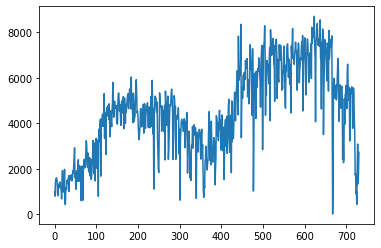

In [0]:
tot.plot(kind='line')

* what can we tell from this?

* we can see that there is a seasonal trend and upward trend 
* so lets 1. make row number a feature and 2. increase k:

In [0]:
# make row number feature:
dayNum=pd.DataFrame(range(0,731),columns=['dayNum'])
test = pd.concat([day1,dayNum],axis=1)
day1x = test.iloc[:,[0,1,2,3,4,6]]
# this is how we could change the data types if needed:
# day1x.astype('float64').dtypes
# day1x.dtypes

In [0]:
# predict again but with k=25
preds, nn = kNN(day1x,tot,day1x,25,allK=True,leave1out=True)
print(preds, nn)

            0            1    ...          729          730
0   2455.000000  2077.000000  ...  2277.000000  3095.000000
1   2675.000000  2104.500000  ...  2013.000000  4390.500000
2   2584.000000  2153.666667  ...  3054.666667  4718.666667
3   2775.750000  2396.750000  ...  3146.750000  4868.750000
4   2636.000000  2138.800000  ...  3063.800000  5017.200000
5   2572.000000  2185.166667  ...  2878.333333  5068.166667
6   2348.142857  2013.714286  ...  2851.285714  5129.142857
7   2154.750000  2126.750000  ...  2686.000000  5168.625000
8   2363.777778  2109.222222  ...  2761.777778  5209.000000
9   2419.200000  2141.200000  ...  2798.500000  5214.100000
10  2483.454545  2164.909091  ...  2754.181818  5218.909091
11  2367.833333  2107.166667  ...  2826.583333  5258.833333
12  2270.153846  2255.538462  ...  2996.461538  5171.846154
13  2351.500000  2270.928571  ...  2946.571429  5230.000000
14  2336.866667  2225.466667  ...  3061.400000  5142.000000
15  2464.625000  2418.375000  ...  3041.

In [0]:
# check new loss
losses = findOverallLoss(preds,tot)
print(losses)

list(losses.index[losses == min(losses)])
# looks like 6 is the best k (because it has the lowest loss)

0     712.734610
1     630.179891
2     614.223894
3     594.923051
4     574.033653
5     566.156863
6     569.532539
7     571.191860
8     569.533820
9     568.020383
10    569.346226
11    570.735066
12    573.948122
13    574.632109
14    579.284907
15    585.412363
16    587.399050
17    588.539444
18    588.179279
19    592.032763
20    593.071331
21    594.024002
22    597.294891
23    598.314295
dtype: float64


[5]

* looks like 11 is the best k (because it has the lowest loss)
* and its has a much lower value (than using k=8 and no row numbers above), yay!

# 1.13. Going Further with This Data

* looks like summer is also a good indicator of higher ridership
* lets try adding it in:


In [0]:
# season was removed so reload original data:
day1 = pd.read_csv(my_path)

# make a column of zeros first
summer = np.zeros(shape=(1,day1.shape[0])).T
summer = pd.DataFrame(summer,columns=['summer'])

# find indices with summer (season == 3)
inds = day1.index[day1['season'] == 3].tolist()

In [0]:
# set the summer variable to 1 everywhere season is summer
# eg. indicator for summer
summer.iloc[inds,] = 1
test = pd.concat([day1x,summer],axis=1)
test.head()

# we could also change columns to categorys/factors
# test['workingday'] = test['workingday'].astype('category')
# test['summer'] = test['summer'].astype('category')
# test.dtypes

,workingday,temp,atemp,hum,windspeed,dayNum,summer
0,-1.471225,-0.826662,-0.679946,1.250171,-0.387892,-1.729683,0.0
1,-1.471225,-0.721095,-0.740652,0.479113,0.749602,-1.724944,0.0
2,0.679706,-1.634657,-1.749767,-1.339274,0.746632,-1.720205,0.0
3,0.679706,-1.614780,-1.610270,-0.263182,-0.389829,-1.715466,0.0
4,0.679706,-1.467414,-1.504971,-1.341494,-0.046307,-1.710728,0.0


* looks like the minimum loss is still at k=6, and the loss is actually very slightly higher (unlike Dr. Matloff thought)... hm?

* Robin will double check this later :)

In [0]:
preds, nn = kNN(test,tot,test,25,allK=True,leave1out=True) 

losses = findOverallLoss(preds,tot)
print(losses)

list(losses.index[losses == min(losses)])

0     717.782490
1     646.026676
2     623.483356
3     609.263338
4     589.461560
5     577.233242
6     577.603674
7     587.054549
8     581.678371
9     586.779207
10    585.786096
11    592.689922
12    599.452804
13    602.784835
14    600.704514
15    605.069853
16    612.004265
17    613.092491
18    616.217582
19    617.485773
20    623.695394
21    626.374705
22    629.178374
23    633.074897
dtype: float64


[5]

# 1.15. p-Hacking

* Say we toss 250 coins 100 times and say that >40 or <60 heads denotes an unbalanced coin

  * eg. An balanced coin has a 5% chance of being denoted unbalanced 
    * eg. 95% is within 2 standard deviations of the mean

      * st.dev= sqrt(var)=npq=sqrt(100*1/2*1/2)=5

* By chance, 5% of 250 (12.5) will be wrongly declared unbalanced

* P-hacking means that when so many features are considered at least one is likely to be seen as *statistically significant*

  * eg. In a ML data contest there so many competitors each with there own methods - at least one is probably going to emerge as superior (due to random variation)

    * It may be just by accident and not be the winner in the next competition on the same type of data (and other data points)

  * Lets say we have 4 tuning parameters with 10 possible values- thats 10,000 combinations!

# 1.16. Pitfall: Dirty Data

* as indicated in the previous lecture, NA removal  could lead to either

  * throwing out a lot of rows of data (eg. too much) that could be helpful for better prediction

    * when we could just fill in those columns so we can still use the rows

  * or leaving out important information that only can be obtained from those rows with NA

      * eg. those that decline to respond may have other features different than the rest of the data